In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import squarify
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')

In [28]:
least_most_df = pd.read_csv("../complete Analysis/least_most_ordered_items.csv")
peak_days_df = pd.read_csv("../complete Analysis/peak_days.csv")
peak_hours_df = pd.read_csv("../complete Analysis/peak_hours.csv")
peak_months_df = pd.read_csv("../complete Analysis/peak_months.csv")
sell_during_march_df = pd.read_csv("../complete Analysis/sell_during march.csv")
top_items_df = pd.read_csv("../complete Analysis/top_10_items.csv")
top_categories_df = pd.read_csv("../complete Analysis/top_categories.csv")

# Top Menu Performance

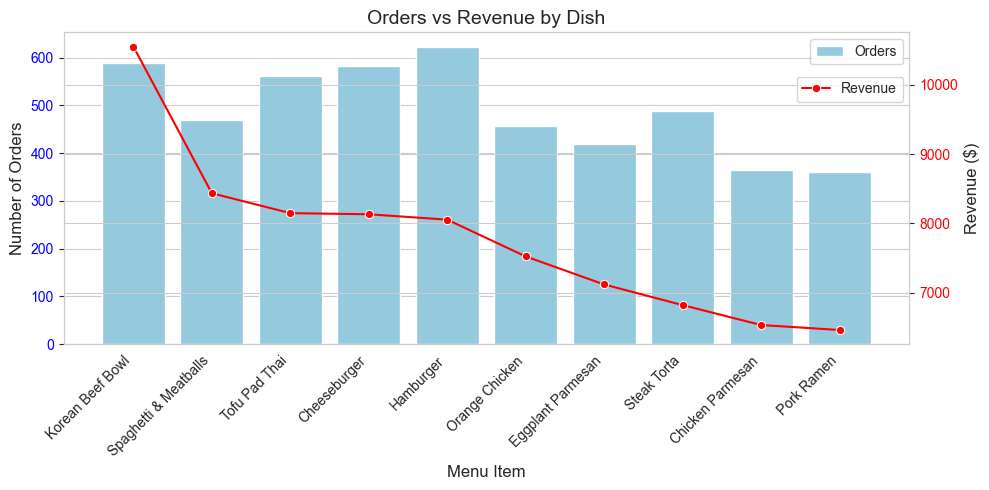

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 5))

sns.barplot(x="item_name", y="total_orders", data=top_items_df, ax=ax1, color="skyblue", label="Orders")
ax1.set_ylabel("Number of Orders", fontsize=12)
ax1.set_xlabel("Menu Item", fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("Orders vs Revenue by Dish", fontsize=14)

ax1.set_xticks(range(len(top_items_df["item_name"])))
ax1.set_xticklabels(top_items_df["item_name"], rotation=45, ha='right')

ax2 = ax1.twinx()
sns.lineplot(x="item_name", y="total_revenue", data=top_items_df, ax=ax2, color="red", marker="o", label="Revenue")
ax2.set_ylabel("Revenue ($)", fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

legend1 = ax1.legend(loc="upper right", bbox_to_anchor=(1, 1))
legend2 = ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.88))

plt.tight_layout()
plt.show()

# Top Categories 

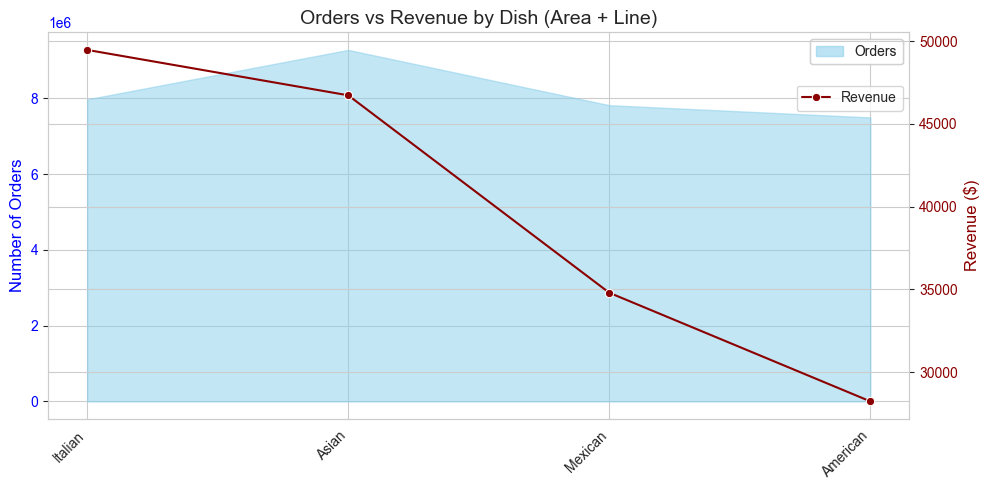

In [30]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.fill_between(top_categories_df["category"], top_categories_df["total_order"], color="skyblue", alpha=0.5, label="Orders")
ax1.set_ylabel("Number of Orders", fontsize=12, color="blue")
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("Orders vs Revenue by Dish (Area + Line)", fontsize=14)
ax1.set_xticks(range(len(top_categories_df["category"])))
ax1.set_xticklabels(top_categories_df["category"], rotation=45, ha='right')

ax2 = ax1.twinx()
sns.lineplot(x="category", y="total_revenue", data=top_categories_df, ax=ax2, color="darkred", marker="o", label="Revenue")
ax2.set_ylabel("Revenue ($)", fontsize=12, color="darkred")
ax2.tick_params(axis='y', labelcolor='darkred')

legend1 = ax1.legend(loc="upper right", bbox_to_anchor=(1, 1))
legend2 = ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.88))
ax1.add_artist(legend1)

plt.tight_layout()
plt.show()


# Least and Most Order Performance

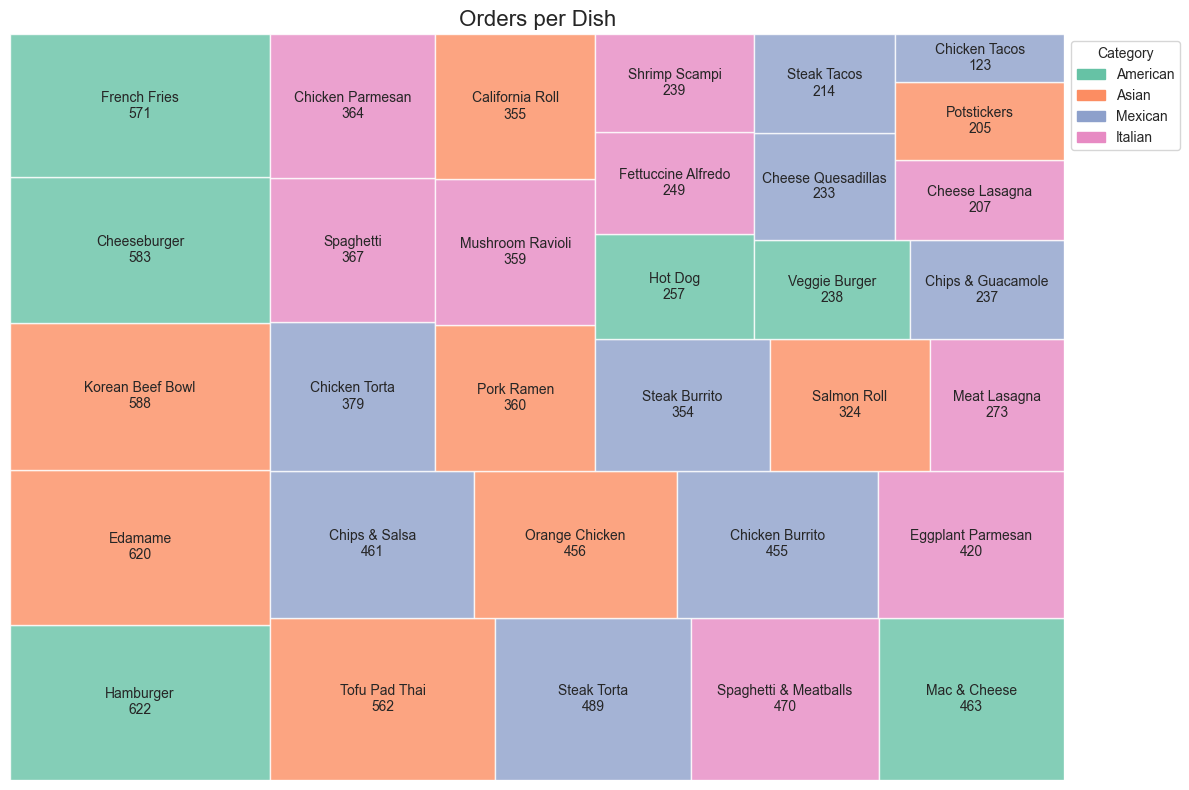

In [31]:
unique_categories = least_most_df['category'].unique()
palette = sns.color_palette("Set2", len(unique_categories))
category_color_map = dict(zip(unique_categories, palette))

colors = [category_color_map[cat] for cat in least_most_df['category']]

labels = [f"{row['item_name']}\n{row['itemOrdered']}" for idx, row in least_most_df.iterrows()]
sizes = least_most_df['itemOrdered']

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
plt.axis('off')
plt.title("Orders per Dish", fontsize=16)

legend_handles = [mpatches.Patch(color=category_color_map[cat], label=cat) for cat in unique_categories]
plt.legend(handles=legend_handles, title="Category", loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# Month and March Sales

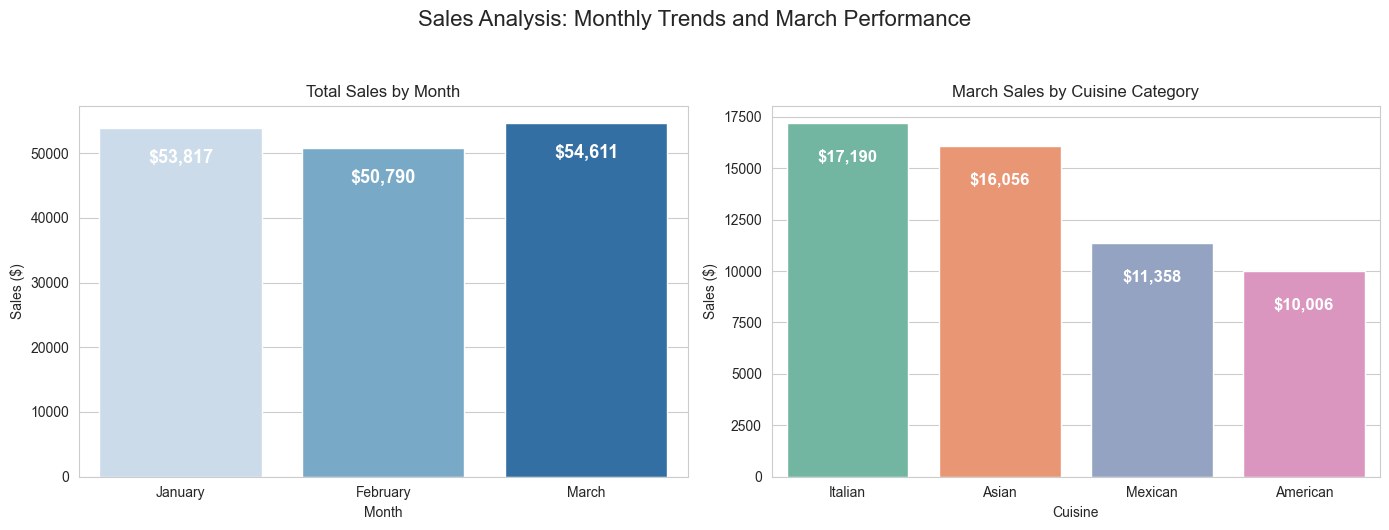

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x="monthName", y="total", data=peak_months_df, ax=ax1, palette="Blues")
ax1.set_title("Total Sales by Month")
ax1.set_ylabel("Sales ($)")
ax1.set_xlabel("Month")

for bar in ax1.patches:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        height - 6000, 
        f"${height:,.0f}",
        ha='center',
        va='bottom',
        fontsize=13,
        color='white',
        fontweight='bold'
    )

sns.barplot(x="category", y="total", data=sell_during_march_df, ax=ax2, palette="Set2")
ax2.set_title("March Sales by Cuisine Category")
ax2.set_ylabel("Sales ($)")
ax2.set_xlabel("Cuisine")

for bar in ax2.patches:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        height - 2000,  
        f"${height:,.0f}",
        ha='center',
        va='bottom',
        fontsize=12,
        color='white',
        fontweight='bold'
    )

plt.suptitle("Sales Analysis: Monthly Trends and March Performance", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


# Order vs Revenue by Days and hours

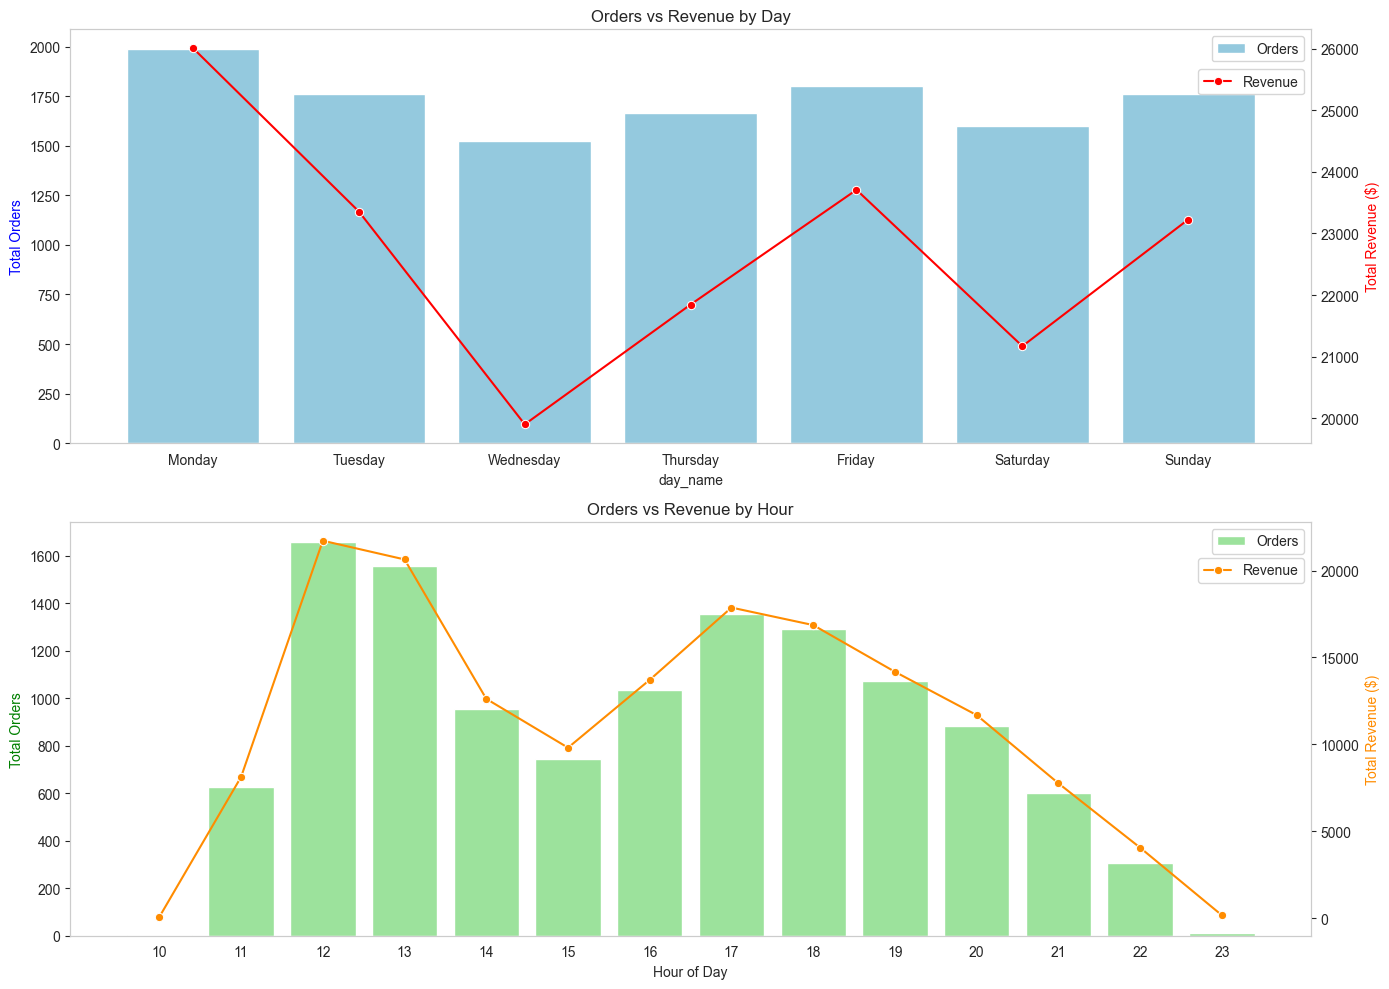

In [33]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
peak_days_df["day_name"] = pd.Categorical(peak_days_df["day_name"], categories=weekday_order, ordered=True)
peak_days_df = peak_days_df.sort_values("day_name")

sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

sns.barplot(x="day_name", y="total_orders", data=peak_days_df, ax=ax1, color="skyblue", label="Orders")
ax1.set_ylabel("Total Orders", color="blue")
ax1.set_title("Orders vs Revenue by Day")

ax1b = ax1.twinx()
sns.lineplot(x="day_name", y="total_revenue", data=peak_days_df, ax=ax1b, color="red", label="Revenue", marker="o")
ax1b.set_ylabel("Total Revenue ($)", color="red")

ax1.legend(loc="upper right", bbox_to_anchor=(1, 1))
ax1b.legend(loc="upper right", bbox_to_anchor=(1, 0.92))

peak_hours_df['time'] = peak_hours_df['time'].astype(str)

sns.barplot(x="time", y="total_orders", data=peak_hours_df, ax=ax2, color="lightgreen", label="Orders")
ax2.set_ylabel("Total Orders", color="green")
ax2.set_title("Orders vs Revenue by Hour")
ax2.set_xlabel("Hour of Day")


ax2b = ax2.twinx()
sns.lineplot(x="time", y="total_revenue", data=peak_hours_df, ax=ax2b, color="darkorange", label="Revenue", marker="o")
ax2b.set_ylabel("Total Revenue ($)", color="darkorange")

legend1 = ax2.legend(loc="upper right", bbox_to_anchor=(1, 1))
legend2 = ax2b.legend(loc="upper right", bbox_to_anchor=(1, 0.93))

ax1.grid(False)
ax2.grid(False)
ax1b.grid(False)
ax2b.grid(False)

plt.tight_layout()
plt.show()